### File for generating figures for DNN filter paper

In [1]:
#setup - rememeber to switch to tensorflow 2.3 kernel...
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime
import trimesh
import time
from vedo import *
from ipyvtklink.viewer import ViewInteractiveWidget

#limit GPU memory ------------------------------------------------
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    memlim = 2*1024
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
  except RuntimeError as e:
    print(e)
#-----------------------------------------------------------------

print(tf.__version__)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib notebook

%load_ext tensorboard

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2
%autosave 180

2022-11-07 20:08:50.110211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 20:08:50.215091: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 20:08:50.569611: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 20:08:50.569655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.10.0


2022-11-07 20:08:51.862832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:08:51.886709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:08:51.886874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Autosaving every 180 seconds


In [2]:
#load mesh of object
surf_fn = "/home/derm/ASAR/v3/perspective_shift/figures/wall_scaled.stl"
M = trimesh.load(surf_fn)
#get ground truth translation
gt = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/figures/gt.txt")
print(gt)
#load point clouds of surface generated in Matlab
pts1_fn = "/home/derm/ASAR/v3/perspective_shift/figures/s1.txt"
pts1 = np.loadtxt(pts1_fn)
pts2_fn = "/home/derm/ASAR/v3/perspective_shift/figures/s2.txt"
pts2 = np.loadtxt(pts2_fn)
# pts = pts - gt #+ np.array([20,5,1.72])

#temp for making wall fig
pts2 = pts2[pts2[:,1] < -39]
pts1 = pts1[pts1[:,1] < -40]
print(np.shape(pts2))

[-40.  -40.   -5.2]
(1595, 3)


In [3]:
#plot with Vedo
plt1 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
disp = []
disp.append(Points(pts1, c = 'red', r = 5, alpha = 1))
disp.append(Points(pts2 - np.array([1,1,0]), c = 'blue', r = 5, alpha = 1))
w1 = Mesh(M).c("gray").alpha(1)
w1.pos(gt[0], gt[1], gt[2])
print(gt[2])
# disp.append(w1)

# L = Light(pos = (30,30,30), focalPoint = (0,0,0), angle = 180, c = (1,1,1), intensity = 1, removeOthers = False)
# disp.append(L)

plt1.show(disp, "Fig 2.1")
ViewInteractiveWidget(plt1.window)

-5.2


ViewInteractiveWidget(height=1043, layout=Layout(height='auto', width='100%'), width=1280)

## Plot Points + distributions

In [ ]:
#Run ICET
import os
import sys
import inspect
# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(os.path.dirname(currentdir))
# sys.path.insert(0, parentdir)

# sys.path.insert(0,"/home/derm/ASAR/v3")

print(currentdir)
# print(parentdir)
# print(sys.path)

from ICET_spherical import ICET

D = True
# D = False
it1 = ICET(cloud1 = pts1, cloud2 = pts2,  fid = 70, draw = D, 
            niter = 5, group= 2, RM = False, DNN_filter = False)

#add mesh to ICET visualization
w2 = Mesh(M).c("gray").alpha(0.25)
w2.pos(gt[0], gt[1], gt[2])
it1.disp.append(w2)
it1.plt.show(it1.disp, "Figure 2", resetcam = False)

ViewInteractiveWidget(it1.plt.window)

# Missed Detection/ False Alarm plots

In [4]:
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import numpy as np

plt.rcParams.update({
    "font.family": "serif",
    "font.sans-serif": ["Times"],
    "font.size": 12})

<IPython.core.display.Javascript object>


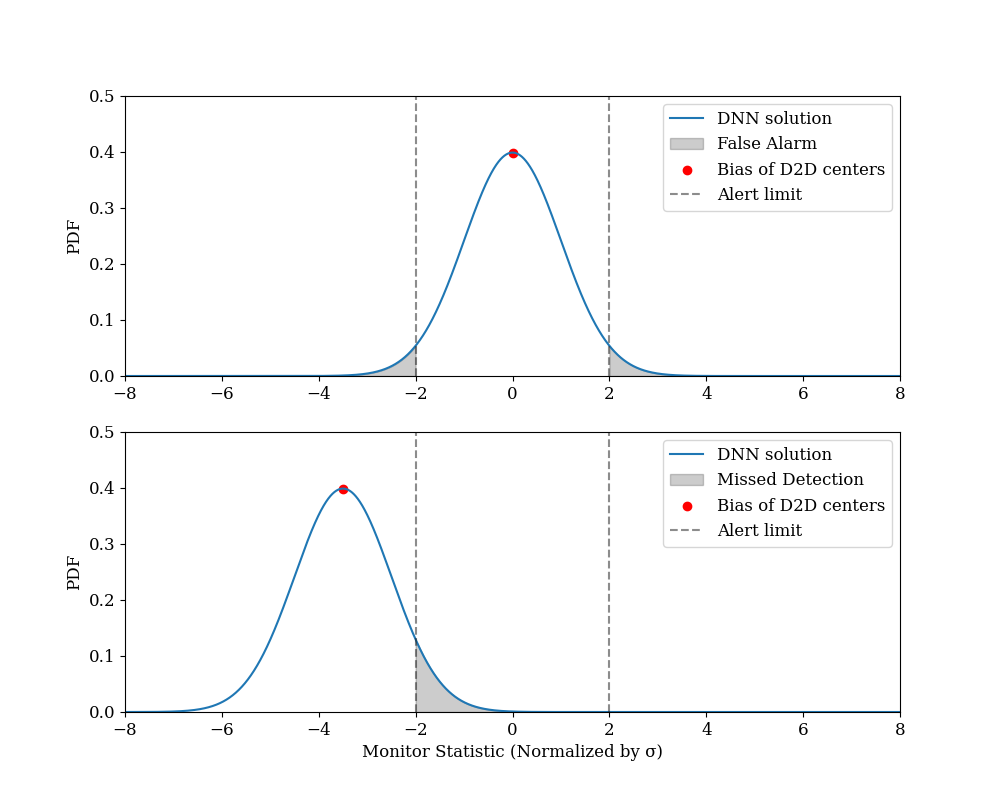

0.3989422804014327


In [5]:
#2 Sided Plots
fig, ax = plt.subplots(2,1)

thresh = 2
width = 8
xlim = 8
bias = -3.5

#Top Plot: 
x_data = np.arange(-width, width, 0.001)
y_data = stats.norm.pdf(x_data, 0, 1)
ax[0].plot(x_data, y_data, label = "DNN solution")
ax[0].set_ylim(0,0.5)
ax[0].set_xlim(-xlim,xlim)
ax[0].set_ylabel("PDF")
ax[0].fill_between(x_data[x_data > thresh],
                   stats.norm.pdf(x_data[x_data > thresh], 0, 1), 
                   color = [0,0,0], alpha = 0.2, label = 'False Alarm')
ax[0].fill_between(x_data[x_data < -thresh],
                   stats.norm.pdf(x_data[x_data < -thresh], 0, 1), 
                   color = [0,0,0], alpha = 0.2)
ax[0].scatter(0, np.max(y_data), color = (1,0,0), label = 'Bias of D2D centers')
ax[0].plot(thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5), label = "Alert limit")
ax[0].plot(-thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5))
ax[0].legend(loc = 'upper right')

#Bottom Plot
ax[1].set_xlabel("Monitor Statistic (Normalized by σ)")
ax[1].set_ylabel("PDF")
x_data = np.arange(-width, width, 0.001)
y_data = stats.norm.pdf(x_data-bias, 0, 1)
ax[1].plot(x_data, y_data, label = "DNN solution")
ax[1].set_ylim(0,0.5)
ax[1].set_xlim(-xlim,xlim)
ax[1].set_ylabel("PDF")
if bias > 0:
    ax[1].fill_between(x_data[x_data < thresh],
                       stats.norm.pdf(x_data[x_data < thresh] - bias, 0, 1), 
                       color = [0,0,0], alpha = 0.2, label = 'False Alarm')
if bias < 0:
    ax[1].fill_between(x_data[x_data > -thresh],
                       stats.norm.pdf(x_data[x_data > -thresh] - bias, 0, 1), 
                       color = [0,0,0], alpha = 0.2, label = 'Missed Detection')
ax[1].scatter(bias, np.max(y_data), color = (1,0,0), label = 'Bias of D2D centers')
ax[1].plot(thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5), label = "Alert limit")
ax[1].plot(-thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5))
ax[1].legend(loc = 'upper right')

print(np.max(y_data))

<IPython.core.display.Javascript object>


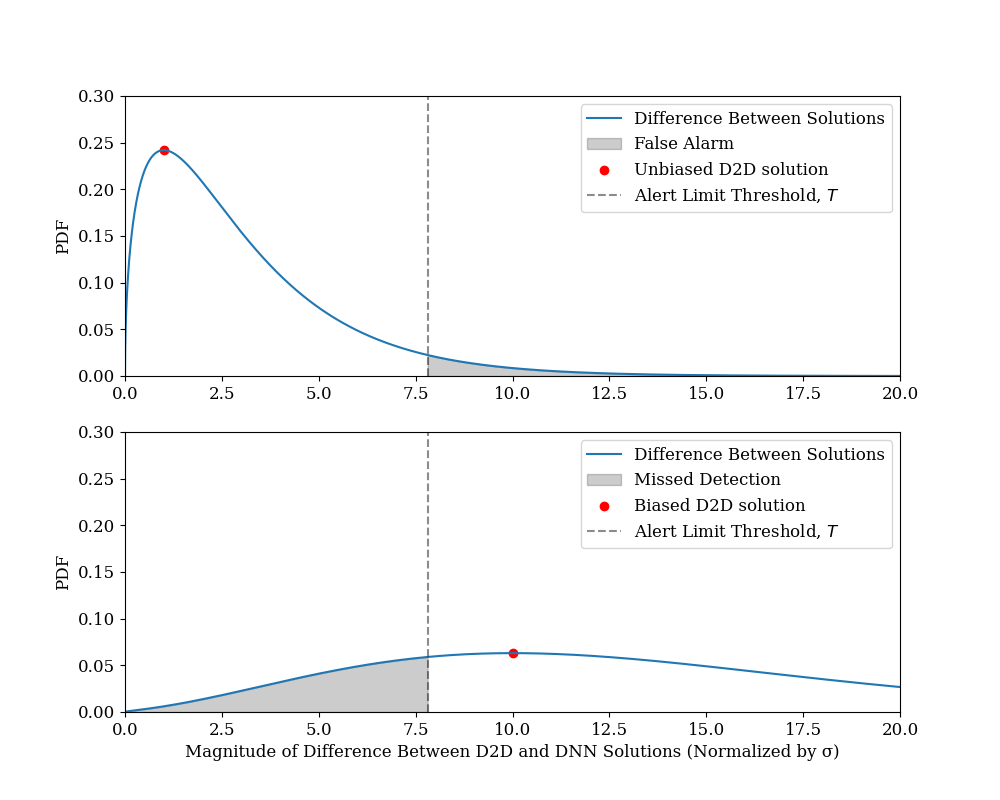

In [6]:
#1 Sided Plots
fig, ax = plt.subplots(2,1)

thresh = 7.81 #associated with 95% confidence bound for 3DOF chi-square with sigma=1
# thresh = 6.25 #90%
df = 3 #degrees of freedom
nc = 10 #Noncenterality Parameter gamma
width = 20
xlim = 20
stretch = 1 #larger number means more squish
thresh = thresh/stretch

#Top Plot:
x_data = np.arange(0, width, 0.001)
y_data = stats.chi2.pdf(x_data*stretch, df=3)

ax[0].plot(x_data, y_data, label = "Difference Between Solutions")
ax[0].set_ylim(0,0.3)
ax[0].set_xlim(0,xlim)
ax[0].set_ylabel("PDF")
ax[0].fill_between(x_data[x_data > thresh],
                   stats.chi2.pdf(stretch*x_data[x_data > thresh], df=3),
                   color = [0,0,0], alpha = 0.2, label = 'False Alarm')
# ax[0].scatter(x_data[1000], y_data[1000], color = (1,0,0), label = 'Bias of D2D solution')
ax[0].scatter(x_data[y_data == np.max(y_data)], np.max(y_data), color = (1,0,0), label = 'Unbiased D2D solution')
ax[0].plot(thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5), label = "Alert Limit Threshold, $T$")
ax[0].plot(-thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5))
ax[0].legend(loc = 'upper right')

#Bottom Plot - TODO- stretch this to start at 0
ax[1].set_xlabel("Magnitude of Difference Between D2D and DNN Solutions (Normalized by σ)")
ax[1].set_ylabel("PDF")
ax[1].set_ylim(0,0.3)
ax[1].set_xlim(0,xlim)
ax[1].set_ylabel("PDF")

#old (wrong) - using shifted chi-squre distribution---------------------------------------
# bias = 3
# ax[1].plot(x_data+bias, y_data, label = "Difference Between Solutions")
# ax[1].fill_between(x_data[x_data < thresh-bias] + bias,
#                        stats.chi2.pdf(stretch*x_data[x_data < thresh-bias], df=3),
#                        color = [0,0,0], alpha = 0.2, label = 'Missed Detection')
#new- Non-central Chi-Square distribution-------------------------------------------------
y_data_biased = stats.ncx2(df, nc).pdf(x_data*stretch)
ax[1].plot(x_data, y_data_biased, label = "Difference Between Solutions")
ax[1].fill_between(x_data[x_data < thresh],
                   y_data_biased[x_data < thresh],
                   color = [0,0,0], alpha = 0.2, label = 'Missed Detection')
#-----------------------------------------------------------------------------------------

ax[1].scatter(x_data[y_data_biased == np.max(y_data_biased)], np.max(y_data_biased), color = (1,0,0), label = 'Biased D2D solution')
ax[1].plot(thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5), label = "Alert Limit Threshold, $T$")
ax[1].plot(-thresh*np.ones([10,1]), np.linspace(0, 0.5, 10), ls = '--', color = (0.1, 0.1, 0.1, 0.5))
ax[1].legend(loc = 'upper right')


## Figure 1: draw multiple objects in same scene

In [7]:
# bgc = (0,0,0)
bgc = (1,1,1) #background color
mc  = (0.5,0.5,0.5) #'white' #
plt2 = Plotter(N = 1, axes = 4, bg = bgc, interactive = True)
disp2 = []
alph = 0.8#alpha for points
rad = 4

#load point clouds
c1 = np.loadtxt('fig1_s1.txt') 
c2 = np.loadtxt('fig1_s2.txt')
gt = np.loadtxt('fig1_gt.txt')
print(gt)
ground = -2.55 #define ground height
c1_ground = c1[c1[:,2] < ground]
c2_ground = c2[c2[:,2] < ground]
c1 = c1[c1[:,2] > ground] #remove ground plane
c2 = c2[c2[:,2] > ground]

surf_fn = "Assembly1_scaled.stl"
M = trimesh.load(surf_fn)
w1 = Mesh(M).c(mc).alpha(1)
w1.pos(0, 0, -1.2)
w1.crop(bounds = [-10,10,-10,10,-1.45,5])
disp2.append(w1)

vox_fn = "voxel.stl"
v1 = Mesh(trimesh.load(vox_fn)).c((0,0,0)) #draw voxel around head of dummy
v1.pos(-5.5,7.5,0)
disp2.append(v1)

v2 = Mesh(trimesh.load(vox_fn)).c((0,0,0))
v2.pos(2.5,7,-1)
disp2.append(v2)


#add light 
# L = Light(pos = (0,-10,30), focalPoint = (0,0,0), angle = 180, c = (1,1,1), intensity = 1, removeOthers = False)
# disp2.append(L)

disp2.append(Points(c1, c = 'red', r = rad, alpha = alph))
disp2.append(Points(c2 - gt/10, c = 'blue', r = rad, alpha = alph))
disp2.append(Points(c1_ground, c = 'red', r = rad, alpha = alph/4))
disp2.append(Points(c2_ground - gt/10, c = 'blue', r = rad, alpha = alph/4))

plt2.show(disp2, "Figure 1")
ViewInteractiveWidget(plt2.window)

[100.   0.   0.]


ViewInteractiveWidget(height=1043, layout=Layout(height='auto', width='100%'), width=1280)

# Experiment 2: Correcting ICET Estimates with DNN

<IPython.core.display.Javascript object>


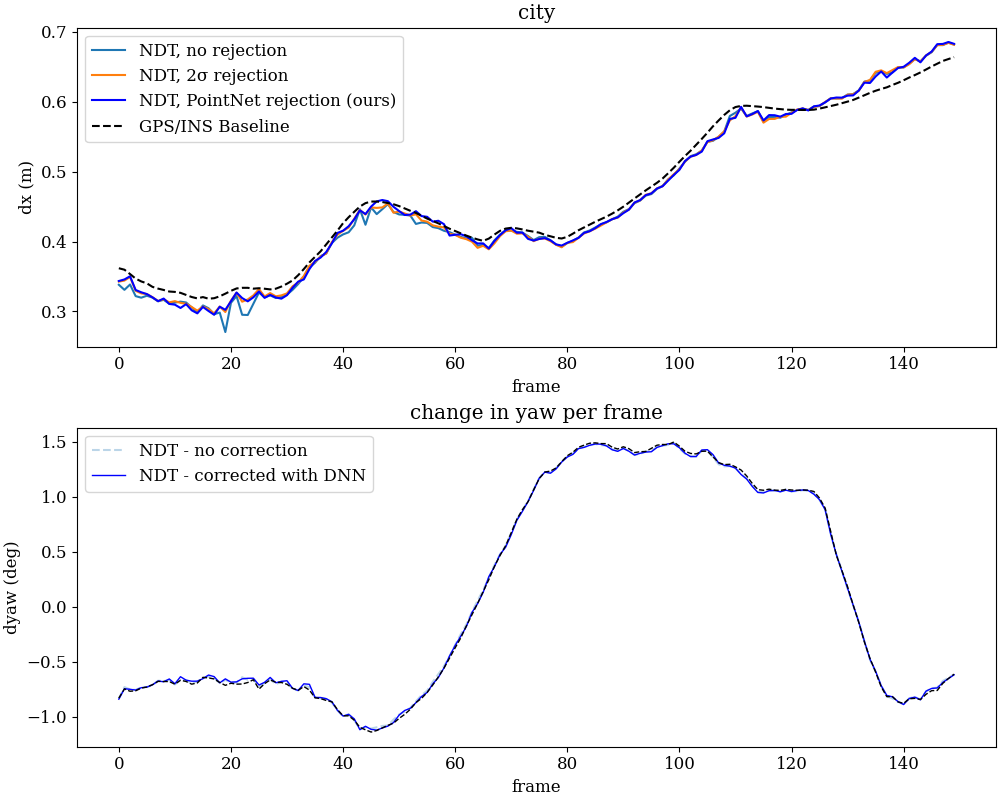

In [59]:
import matplotlib.pyplot as plt
%matplotlib notebook
# font = {'fontname':'Times New Roman'}

# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/ICET_estimates_v8.txt") #best old DNN (from spring...)

# #0005 ~~~~~~~~~~~
# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# # ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_CompactNet_2cmThresh.txt") #CompactNet.kmod 

# # OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/OXTS_baseline_v17.txt") #using vel
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_OXTS_baseline_alt.txt")#GNSS conversion

# BC = np.loadtxt("/home/derm/ASAR/v3/Before_correction_v18.txt") #actually before correction
# # BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# # ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/ICET_pred_stds_v13.txt") #old (for debug)
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_pred_stds_2cmThresh.txt")

# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_OXTS_baseline_gps.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_pred_stds_5cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_noDNN.txt")

ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_CompactNet_3cmThresh.txt") #CompactNet.kmod 
OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_OXTS_baseline_gps.txt")
ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_pred_stds_3cmThresh.txt")
BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_noDNN.txt")
worst = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0005_noFilter.txt")
# BC = worst #debug
# #~~~~~~~~~~~~~~~~

#0095~~~~~~~~~~~~
# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0095_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0095_OXTS_baseline_gps.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0095_pred_stds_5cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0095_noDNN.txt")
# # OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0095_OXTS_baseline_alt.txt")
#~~~~~~~~~~~~~~~~

# #0027 ~~~~~~~~~~~~ straight road, heavily wooded
# # ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# # # OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_OXTS_baseline_gps.txt")
# # OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_OXTS_baseline_alt.txt")
# # ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_pred_stds.txt")
# # BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_noDNN.txt")

# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027v2_CompactNet_3cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027_OXTS_baseline_alt.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027v2_pred_stds_3cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0027v2_noDNN.txt")
# #~~~~~~~~~~~~~~~~

# #0117 ~~~~~~~~~~~~ straight campus road, lots of trees (decent improvement with DNN)
# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0117_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0117_OXTS_baseline_gps.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0117_pred_stds_5cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0117_noDNN.txt")
# #~~~~~~~~~~~~~~~~

# #0070 ~~~~~~~~~~~~ straight highway with large trees and embankment. No foliage, no large constraining surfaces
# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0070_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0070_OXTS_baseline_gps.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0070_pred_stds_5cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0070_noDNN.txt")
# #~~~~~~~~~~~~~~~~

# #0071 ~~~~~~~~~~~~ crowded shopping area (timing errors!)
# ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0071_CompactNet_5cmThresh.txt") #CompactNet.kmod 
# OXTS_baseline = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0071_OXTS_baseline_gps.txt")
# ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0071_pred_stds_5cmThresh.txt")
# BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KITTI_0071_noDNN.txt")
# offset = 7
# ICET_estimates = ICET_estimates[:-offset] #fix offsest errors in ground truth
# BC = BC[:-offset]
# ICET_pred_stds = ICET_pred_stds[:-offset]
# OXTS_baseline = OXTS_baseline[offset:]
# #~~~~~~~~~~~~~~~~

# OXTS_baseline = (OXTS_baseline/0.1*0.1037 + OXTS_baseline)/2 #correct for timing differences
OXTS_baseline = OXTS_baseline/0.1*0.1037  #correct for timing differences


# ICET_estimates[:,0] = ICET_estimates[:,0]/tvec*0.1

#fix sign errors
ICET_estimates[:,1] = -ICET_estimates[:,1]
ICET_estimates[:,3:] = -ICET_estimates[:,3:]
BC[:,1] = -BC[:,1]
BC[:,3:] = -BC[:,3:]

style1 = 'b-'
style2 = 'k--'
style3 = '--'

# gt_fwd = np.sqrt(OXTS_baseline[:,0]**2 + OXTS_baseline[:,1]**2)
gt_fwd = OXTS_baseline[:,0]

fig, ax = plt.subplots(2,1, constrained_layout = True)
ax[0].plot(worst[:,0], label = 'NDT, no rejection')
ax[0].plot(BC[:,0], label = 'NDT, 2σ rejection')
ax[0].plot(ICET_estimates[:,0], style1, label = 'NDT, PointNet rejection (ours)')
ax[0].plot(gt_fwd, style2, label = 'GPS/INS Baseline')
# ax[0,0].plot(np.sqrt(OXTS_baseline[:,0]**2 + OXTS_baseline[:,1]**2), style2, label = 'GPS/INS Baseline')
ax[0].set_title("city")
ax[0].set_ylabel("dx (m)")
ax[0].legend(loc = 'best')
ax[0].set_xlabel("frame")

ax[1].plot(np.rad2deg(BC[:,5]), style3, alpha = 0.3, label = "NDT - no correction")
ax[1].plot(np.rad2deg(ICET_estimates[:,5]), style1, lw = 1, label = "NDT - corrected with DNN")
ax[1].plot(np.rad2deg(OXTS_baseline[:,5]), style2, lw = 1)
ax[1].set_title("change in yaw per frame")
ax[1].set_ylabel("dyaw (deg)")
ax[1].set_xlabel("frame")
ax[1].legend(loc = 'best')


# fig.tight_layout(h_pad = 0.1)
plt.show()

<IPython.core.display.Javascript object>


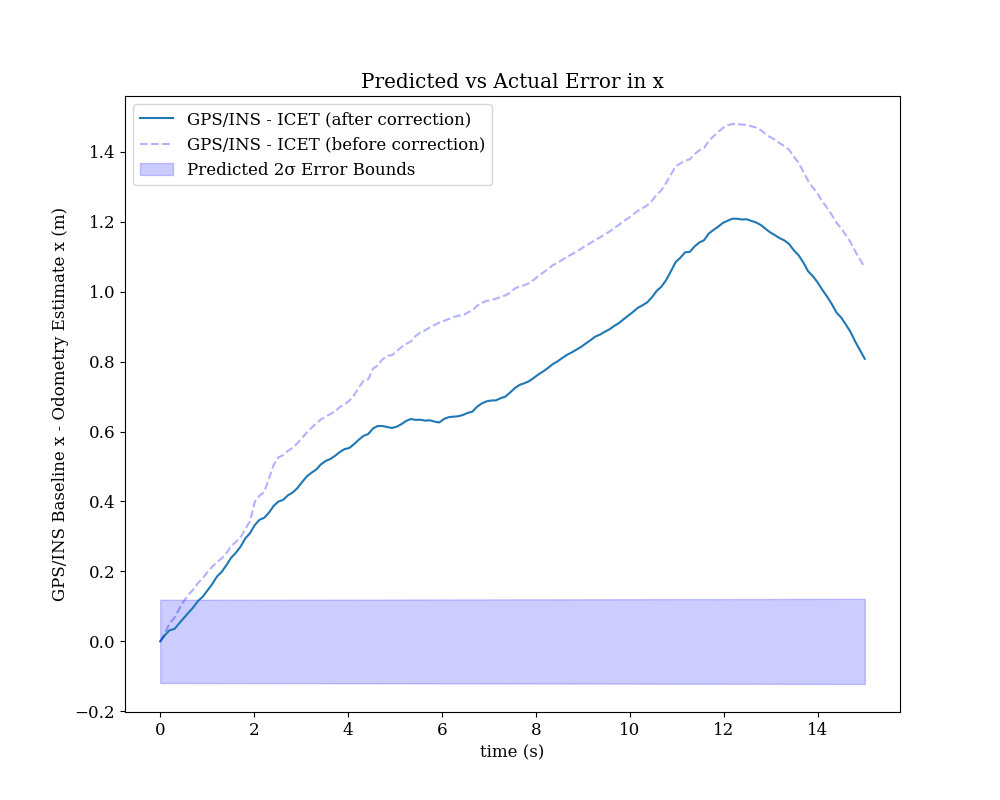

correlation coefficient 
 [[ 1.         -0.14725768]
 [-0.14725768  1.        ]]


Text(0, 0.5, 'GPS/INS Baseline x - Odometry Estimate x (m)')

In [53]:
#plot error between ICET and absolute position
fig3, ax3 = plt.subplots(1,1)

#which component to look at
# c = 5 #yaw
c = 0 # x (forward movement)

diffx = OXTS_baseline[:,c] - ICET_estimates[:,c]
diffx_BC = OXTS_baseline[:,c] - BC[:,c]

# print(abs(diffx))
print("correlation coefficient \n", np.corrcoef(abs(diffx), ICET_pred_stds[:,0]))

#flip sign when looking at yaw
if c ==5:
    diffx = -diffx 
    diffx_BC = -diffx_BC
    
cum_err = np.zeros(np.shape(ICET_pred_stds))
cum_diffx = np.zeros(np.shape(diffx))
cum_diffx_BC = np.zeros(np.shape(diffx_BC))

for i in range(np.shape(ICET_pred_stds)[0]):
    cum_err[i,:] = np.sum(ICET_pred_stds[:i,:]**2, axis = 0)
    #add in baseline OXTS 1-sigma errors
    cum_err[i,:] += np.sqrt(2)*np.array([0.05,0.05,0.1,0.0005,0.0005,0.001])**2
#     cum_err[i,:] += np.sqrt(2)*np.array([0.08,0.08,0.1,0.0005,0.0005,0.001745])**2
#     cum_err[i,:] += np.sqrt(2)*np.array([0.0,0.0,0.,0.000,0.000,0.00])**2
    cum_err[i,:] = np.sqrt(cum_err[i,:]) 
    
for j in range(np.shape(diffx)[0]):
    cum_diffx[j] = np.sum(diffx[:j]) 
    cum_diffx_BC[j] = np.sum(diffx_BC[:j]) 

# # #old (error for each individual timestep)------------------------
# ax3.plot(diffx, label = 'GPS/INS - NDT (with DNN)')
# ax3.plot(diffx_BC, 'b--', label = 'GPS/INS - NDT (no DNN)', alpha = 0.3)
# ax3.fill_between(np.linspace(0,150,np.shape(ICET_pred_stds)[0]), -2*ICET_pred_stds[:,c], 2*ICET_pred_stds[:,c], 
#                  color = (0.5,0.5,0.5,0.4), label = 'ICET Predicted 2σ Error Bounds')
# #-------------------------------------------------------------------

# #new (accumulated differences in error)--------------------------
# ax3.plot(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), cum_diffx_with_ground, label = 'GPS/INS - ICET')
ax3.plot(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), cum_diffx, label = 'GPS/INS - ICET (after correction)')
ax3.plot(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), cum_diffx_BC, 'b--', alpha = 0.3, label = 'GPS/INS - ICET (before correction)')
ax3.fill_between(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), -2*cum_err[:,c], 2*cum_err[:,c], 
                 color = (0,0,1,0.2), label = 'Predicted 2σ Error Bounds')
# # --------------------------------------------------------------------

# ax3.legend(loc = 'lower left')
ax3.legend(loc = 'best')
ax3.set_title("Predicted vs Actual Error in x")
ax3.set_xlabel("time (s)")
ax3.set_ylabel("GPS/INS Baseline x - Odometry Estimate x (m)")
# ax3.set_title("Predicted vs Actual Error in yaw")
# ax3.set_xlabel("time (s)", **font)
# ax3.set_ylabel("GPS/INS Baseline yaw - Odometry Estimate yaw (rad)", **font)
# ax3.set_ylim(-0.032,0.045)
# ax3.set_ylim([-0.07,0.07])

In [54]:
#get RMSE for each method
import sklearn
from sklearn.metrics import mean_squared_error

# print(diffx)
# print(diffx_BC)

RMSE_DNN = np.sqrt(mean_squared_error(diffx, np.zeros(np.shape(diffx))))
print("RMSE_DNN: \n", RMSE_DNN)

RMSE_BC = np.sqrt(mean_squared_error(diffx_BC, np.zeros(np.shape(diffx))))
print("RMSE_BC: \n", RMSE_BC)


RMSE_DNN: 
 0.01282149984145335
RMSE_BC: 
 0.015002381371851125


# Experiment 2 on Synthetic KITTI-CARLA dataset

(500000, 13)
[ -73.59878067 -258.58998854    7.12791812]


<IPython.core.display.Javascript object>


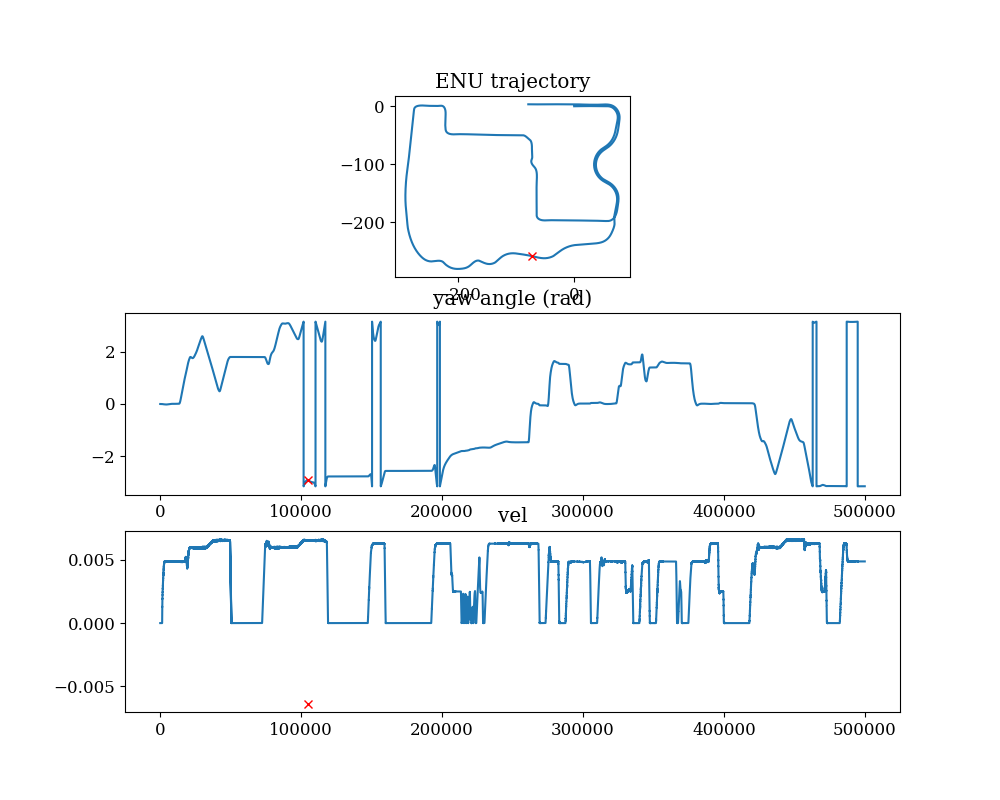

(3, 499999)


In [47]:
def R2Euler(mat):
    if len( np.shape(mat) ) == 2:
        mat = mat[None, :, :]
    R_sum = np.sqrt(( mat[:,0,0]**2 + mat[:,0,1]**2 + mat[:,1,2]**2 + mat[:,2,2]**2 ) / 2)
    phi = np.arctan2(-mat[:,1,2],mat[:,2,2])
    theta = np.arctan2(mat[:,0,2], R_sum)
    psi = np.arctan2(-mat[:,0,1], mat[:,0,0])
    angs = np.array([phi, theta, psi])
    return angs

#get ground truth transformation

town = 'Town07'
idx = 1050 #1050 for town1, 50 for town7


fpl = np.loadtxt("/home/derm/KITTICARLA/dataset/" + town + "/generated/full_poses_lidar.txt") #full poses lidar
print(np.shape(fpl))

#plot pose at arbitrary point in drive NEED TO MULTIPLY THIS BY 100??!

#create rotation vector
R = np.array([[fpl[:,0], fpl[:,1], fpl[:,2]],
              [fpl[:,4], fpl[:,5], fpl[:,6]],
              [fpl[:,8], fpl[:,9], fpl[:,10]]]).T
# R = np.transpose(R, (0,2,1))
# print(np.shape(R))
# print(R[-3])

angs = R2Euler(R) #convert to euler angles (for use with ICET)
# print(angs.T)

T = np.array([fpl[:,3], fpl[:,7], fpl[:,11]]).T #get translation vector
print(T[idx*100])

#plot results
fig, ax = plt.subplots(3,1)
ax[0].plot(T[:,0], T[:,1])
ax[0].plot(T[idx*100,0], T[idx*100,1], 'rx')
ax[0].set_aspect("equal")
ax[0].set_title("ENU trajectory")

ax[1].set_title("yaw angle (rad)")
ax[1].plot(angs[2,:])
ax[1].plot(idx*100, angs[2,idx*100], 'rx')

#TODO: get change in angles between subsequent transformations, fixangs greater than 2pi
vel = np.diff(T.T)
vf = np.sqrt(vel[0,:]**2 + vel[1,:]**2)
print(np.shape(vel))
ax[2].set_title("vel")
ax[2].plot(vf)
ax[2].plot(idx*100, vel[0,idx*100], 'rx')

#sanity check for consistant timesteps...
# dt = np.diff(fpl[:,12])
# bad = dt[abs(dt[:] - 0.001) > 0.00001]
# print(bad)

In [ ]:
import trimesh

skip = 5
noise_scale = 0.02
plt1 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True) #ax=7 gives rulers
disp = []

s1_fn = '/home/derm/KITTICARLA/dataset/' + town + '/generated/frames/frame_%04d.ply' %(idx)
s2_fn = '/home/derm/KITTICARLA/dataset/' + town + '/generated/frames/frame_%04d.ply' %(idx+skip)

dat1 = trimesh.load(s1_fn)
dat2 = trimesh.load(s2_fn)

c1 = dat1.vertices
# c1 += true_traj[(idx)*100]
c1 = c1.dot(R[(idx)*100])
# mesh = Mesh(dat1).c("gray").alpha(1) #draw ignored points on ground plane
# disp.append(mesh)

c2 = dat2.vertices
# c2 += true_traj[(idx+skip)*100]
c2 = c2.dot(R[(idx+skip)*100])
# c2 = c2 + (vel[:,(idx+skip)*100] + vel[:,(idx)*100])*50*(skip) #transform c2 to overlay with c1 #was this
# correction = np.sum(vel[:,((idx-1)*100):((idx-1+skip)*100)], axis = 1) #test1
# c2 = c2 + correction
# print(correction)

# c1 = c1[c1[:,2] > -1.5]
# c2 = c2[c2[:,2] > -1.5] #ground + sidewalk

#display overal trajectory via "poses_lidar.ply" ~~~~~~~~~~~~~~~~~~~~~~~~~~
fn = "/home/derm/KITTICARLA/dataset/" + town + "/generated/poses_lidar.ply"
datposes = trimesh.load(fn)
true_traj = datposes.vertices
# print(true_traj)
disp.append(Points(true_traj - [0, 0, 1.65], alpha = 0.3))

#true location (for viz)
c1 += true_traj[(idx)*100]
c2 += true_traj[(idx+skip)*100]
#center at 0 (for training data)
# c2 += true_traj[(idx+skip)*100] - true_traj[(idx)*100]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
c1 += noise_scale*np.random.randn(np.shape(c1)[0],3)
c2 += noise_scale*np.random.randn(np.shape(c2)[0],3)

disp.append(Points(c1, c = 'red', r = 2, alpha = 1.0))
disp.append(Points(c2, c = 'blue', r = 2, alpha = 1.0))

disp.append(Points(np.array([[0.,0.,0.]]), c = 'purple', r =10))
plt1.show(disp, "surface sampling test")
ViewInteractiveWidget(plt1.window)

In [ ]:
#Town7~~~~~~~~~~~~
ICET_estimates = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KC_Town7_1050_CompactNet_5cmThresh.txt")
ICET_pred_stds = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KC_Town7_1050_pred_stds_5cmThresh.txt")
BC = np.loadtxt("/home/derm/ASAR/v3/perspective_shift/sim_results/KC_Town7_1050_noDNN.txt")
#~~~~~~~~~~~~~~~~

fig, ax = plt.subplots(2,1)

ax[0].plot(vf[1050*100:1150*100:100]*300)
ax[0].plot(ICET_estimates[:,0], 'b')
ax[0].plot(BC[:,0], 'r')